In [1]:
#Import data 
import pandas as pd

df = pd.read_csv("derived_gas_outputs_minutes.csv")

#Dropping column Unnamed 
for col in df.columns:
    print(col)

df.drop(columns = "Unnamed: 0",inplace = True)

#We add the total fees 
#Total fees = GasUsage * BaseFee FIL (burned) + GasLimit * GasPremium FIL (miner's reward) + OverEstimationBurn * BaseFeeFIL
df['total_cost'] = df['mean_gas_used']*df['mean_base_fee_burn'] + df['mean_gas_limit'] *df['mean_gas_premium'] + df['mean_over_estimation_burn']*df['mean_parent_base_fee']
df

Unnamed: 0
timestamp
mean_gas_fee_cap
mean_gas_premium
mean_gas_limit
mean_gas_used
mean_parent_base_fee
mean_base_fee_burn
mean_over_estimation_burn
mean_gas_refund
mean_gas_burned


,timestamp,mean_gas_fee_cap,mean_gas_premium,mean_gas_limit,mean_gas_used,mean_parent_base_fee,mean_base_fee_burn,mean_over_estimation_burn,mean_gas_refund,mean_gas_burned,total_cost
0,2021-06-01 00:00:00+00:00,8.029010e+09,1.017285e+05,3.853911e+07,3.154444e+07,1.075087e+02,3.344824e+09,1.379284e+08,5.712949e+06,1.281725e+06,1.055146e+17
1,2021-06-01 00:01:00+00:00,5.514969e+09,1.010914e+05,3.551579e+07,2.902460e+07,1.041343e+02,2.964455e+09,1.137286e+08,5.395994e+06,1.095194e+06,8.604570e+16
2,2021-06-01 00:02:00+00:00,1.391597e+09,1.016669e+05,3.925006e+07,3.176285e+07,1.062889e+02,3.336958e+09,1.693683e+08,5.889824e+06,1.597390e+06,1.059953e+17
3,2021-06-01 00:03:00+00:00,1.757485e+10,9.744047e+04,3.993927e+07,3.258712e+07,1.071225e+02,3.442124e+09,1.394680e+08,6.046530e+06,1.305622e+06,1.121728e+17
4,2021-06-01 00:04:00+00:00,6.449984e+09,1.002700e+05,3.896426e+07,3.207390e+07,1.000000e+02,3.121567e+09,1.184643e+08,5.705719e+06,1.184643e+06,1.001247e+17
...,...,...,...,...,...,...,...,...,...,...,...
34268,2021-06-25 21:03:00+00:00,5.237974e+09,1.090883e+05,3.823607e+07,3.128294e+07,1.908826e+08,5.883117e+15,2.491660e+14,5.645897e+06,1.307233e+06,2.316027e+23
34269,2021-06-25 21:04:00+00:00,6.282274e+09,1.122319e+05,3.810373e+07,3.152892e+07,1.777791e+08,5.529089e+15,1.826172e+14,5.548940e+06,1.025864e+06,2.067917e+23
34270,2021-06-25 21:06:00+00:00,6.061794e+09,1.079991e+05,3.892744e+07,3.206151e+07,1.695353e+08,5.311621e+15,1.997477e+14,5.687233e+06,1.178698e+06,2.041629e+23
34271,2021-06-25 21:07:00+00:00,3.245141e+09,2.781742e+06,3.845156e+07,3.164617e+07,1.621174e+08,5.090067e+15,1.928663e+14,5.617486e+06,1.187900e+06,1.923481e+23


In [2]:
#We need to convert the timestamp into hours in order to read our data properly, so we can run a linear regression

import numpy as np
#Changing column timestamp to a proper timestamp type 
df['timestamp'] = pd.to_datetime(df['timestamp'])

#we will want a numeric version for regressions later
#this can be interpreted as days since the first entry

df['timestamp_numeric'] = (df['timestamp'] - df['timestamp'].min())  / np.timedelta64(1,'D')
df


,timestamp,mean_gas_fee_cap,mean_gas_premium,mean_gas_limit,mean_gas_used,mean_parent_base_fee,mean_base_fee_burn,mean_over_estimation_burn,mean_gas_refund,mean_gas_burned,total_cost,timestamp_numeric
0,2021-06-01 00:00:00+00:00,8.029010e+09,1.017285e+05,3.853911e+07,3.154444e+07,1.075087e+02,3.344824e+09,1.379284e+08,5.712949e+06,1.281725e+06,1.055146e+17,0.000000
1,2021-06-01 00:01:00+00:00,5.514969e+09,1.010914e+05,3.551579e+07,2.902460e+07,1.041343e+02,2.964455e+09,1.137286e+08,5.395994e+06,1.095194e+06,8.604570e+16,0.000694
2,2021-06-01 00:02:00+00:00,1.391597e+09,1.016669e+05,3.925006e+07,3.176285e+07,1.062889e+02,3.336958e+09,1.693683e+08,5.889824e+06,1.597390e+06,1.059953e+17,0.001389
3,2021-06-01 00:03:00+00:00,1.757485e+10,9.744047e+04,3.993927e+07,3.258712e+07,1.071225e+02,3.442124e+09,1.394680e+08,6.046530e+06,1.305622e+06,1.121728e+17,0.002083
4,2021-06-01 00:04:00+00:00,6.449984e+09,1.002700e+05,3.896426e+07,3.207390e+07,1.000000e+02,3.121567e+09,1.184643e+08,5.705719e+06,1.184643e+06,1.001247e+17,0.002778
...,...,...,...,...,...,...,...,...,...,...,...,...
34268,2021-06-25 21:03:00+00:00,5.237974e+09,1.090883e+05,3.823607e+07,3.128294e+07,1.908826e+08,5.883117e+15,2.491660e+14,5.645897e+06,1.307233e+06,2.316027e+23,24.877083
34269,2021-06-25 21:04:00+00:00,6.282274e+09,1.122319e+05,3.810373e+07,3.152892e+07,1.777791e+08,5.529089e+15,1.826172e+14,5.548940e+06,1.025864e+06,2.067917e+23,24.877778
34270,2021-06-25 21:06:00+00:00,6.061794e+09,1.079991e+05,3.892744e+07,3.206151e+07,1.695353e+08,5.311621e+15,1.997477e+14,5.687233e+06,1.178698e+06,2.041629e+23,24.879167
34271,2021-06-25 21:07:00+00:00,3.245141e+09,2.781742e+06,3.845156e+07,3.164617e+07,1.621174e+08,5.090067e+15,1.928663e+14,5.617486e+06,1.187900e+06,1.923481e+23,24.879861


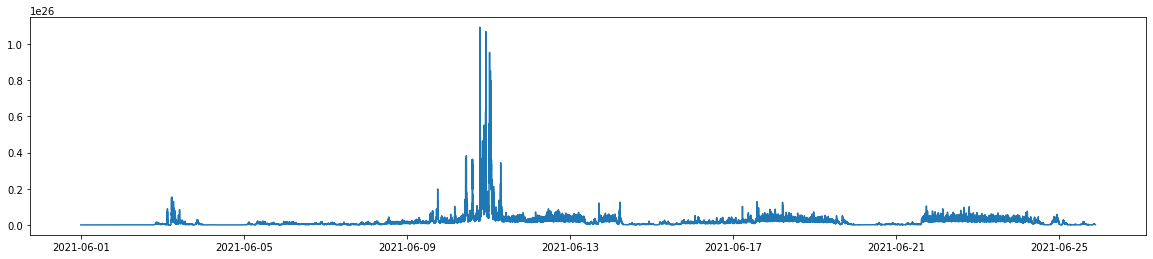

In [3]:
#Graph of the total gas fee costs over the time period 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (20,4)
plt.plot(df['timestamp'], df['total_cost'])
plt.show()


Now we want to check if there is an effect of time on gas price so we estimate the linear model

$$\text{total_cost} = \beta_0 \cdot \text{timestamp} + \beta_1 + \epsilon$$

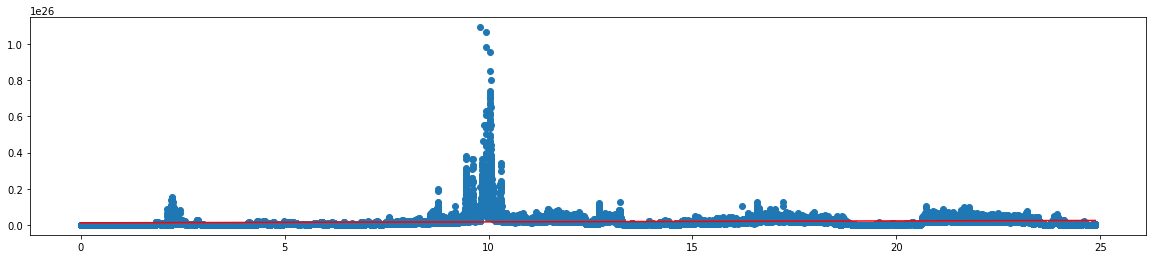

In [4]:
#Run the regression
from sklearn.linear_model import LinearRegression
X = df['timestamp_numeric'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df['total_cost'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) #to make prediction


plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
plt.show()


In [5]:
#Results of Linear Regression
import statsmodels.api as sm
results = sm.OLS(Y,sm.tools.add_constant(X)).fit() #Adding a Constant
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     412.2
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           4.14e-91
Time:                        14:40:54   Log-Likelihood:            -1.9849e+06
No. Observations:               34273   AIC:                         3.970e+06
Df Residuals:                   34271   BIC:                         3.970e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+24   3.66e+22     31.442      0.0

Interpretation of regression of this ** Add*** here

The results shows us the relationship between the timestamp and total cost of gas fees. 


In [6]:
#To run a multiple regression we need to convert hours into dummy variables and set 1 = daytime and 0 = nightime

df['hour']=df['timestamp'].dt.hour
df['hour'][0:100]

# 1 = daytime, 0 = nightime 
df['daytime'] = df['hour'].apply(lambda x: 1 if((x>=7) and (x <= 20)) else 0)
df['daytime'][0:1000]



0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: daytime, Length: 1000, dtype: int64

In the next line we will use a multiple linear regression to measure the difference in total gas fees during daytime versus nightime. 

The dependent variable is "total_cost" since the total cost of gas fees is dependent on the hour of the day. 

The first independent variable I used was "daytime" and the second independent variable I used was "timestamp_numeric" which tells you how many days there are since the start of the data set. 


Formula for Multi-Linear Regression
$$\text{total_cost} = \beta_0 + \beta_1 \cdot \text{timestamp} + \beta_2 \cdot \text{daytime} + \epsilon $$


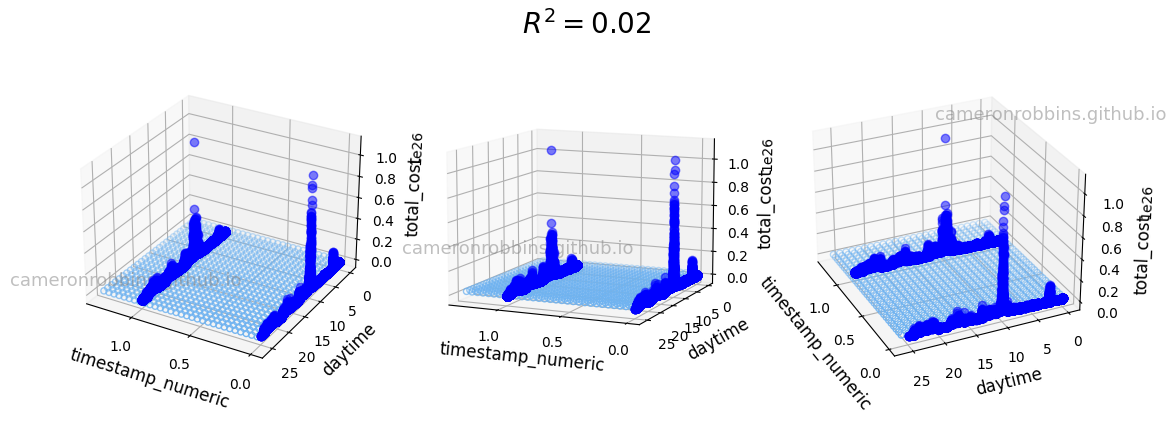

In [65]:
#Source: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = df[['daytime', 'timestamp_numeric']].values.reshape(-1,2)
Y = df['total_cost']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 1.3, 30)   # range of time values
y_pred = np.linspace(0, 26, 26)  # range of  values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='blue', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('timestamp_numeric', fontsize=12)
    ax.set_ylabel('daytime', fontsize=12)
    ax.set_zlabel('total_cost', fontsize=12)
    ax.locator_params(nbins=10, axis='y')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'cameronrobbins.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'cameronrobbins.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'cameronrobbins.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=10, azim=114)
ax3.view_init(elev=28, azim=155)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [71]:
#Results from multi-linear regression
import sklearn
from sklearn import linear_model

X = df[['daytime', 'timestamp_numeric']] # here we have 2 variables for multiple regression. 
Y = df['total_cost']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.3870853084086012e+24
Coefficients: 
 [-4.16699679e+23  5.37311154e+22]
                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     268.2
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          2.72e-116
Time:                        19:41:05   Log-Likelihood:            -1.9849e+06
No. Observations:               34273   AIC:                         3.970e+06
Df Residuals:                   34270   BIC:                         3.970e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [76]:
#We can use this to consider the relative magnitude of the coefficients

df['total_cost'].mean()/regr.coef_[1]




33.340486177985476

In [79]:
df['total_cost'].mean()/regr.coef_[0]


-4.299071008906232

Suggested Direction:

Further analysis could include Filecoin token price data or filecoins competitor prices: Amazon Web Services. Another analysis could include data of the state of how the mempool evolves over time. 